In [1]:
# import librabries
import pandas as pd 
import matplotlib as plt
import numpy as np
import seaborn as sns
import os 
from PIL import  Image

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


2025-09-25 07:36:45.954407: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758785806.157777      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758785806.216104      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# lets set parameter 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
# lets generate a normilizated and batch distributed data for training
imagesize  = 225
batchsize = 32
traindata = train_datagen.flow_from_directory(
    directory="/kaggle/input/dogsvscats/train",
    target_size=(imagesize, imagesize),
    batch_size=batchsize,
    class_mode="binary",   # cat vs dog → binary
    subset="training",
    shuffle=True
)

Found 16000 images belonging to 2 classes.


In [5]:
# lets generate validation set from our training data to measure validation score of model
valdata = train_datagen.flow_from_directory(
    directory="/kaggle/input/dogsvscats/train",
    target_size=(imagesize, imagesize),
    batch_size=batchsize,
    class_mode="binary",
    subset="validation",
    shuffle=True
)

Found 4000 images belonging to 2 classes.


In [6]:
# LETS MAKE OUR TEST IMAGES INTO PROCESSING MANNER
test_datagen = ImageDataGenerator(rescale=1./255)

testdata = test_datagen.flow_from_directory(
    directory="/kaggle/input/dogsvscats/test",
    target_size=(imagesize, imagesize),
    batch_size=batchsize,
    class_mode="binary",
    shuffle=False
)


Found 5000 images belonging to 2 classes.


In [7]:
# LETS MAKE OUR MOEDEL


model = Sequential()
# 1st convolutuion layer
model.add(Conv2D(32,(3,3),padding = "same",activation = "relu",input_shape = (224,224,3)))
BatchNormalization()
model.add(MaxPooling2D((2,2)))

# 2nd convolution 
model.add(Conv2D(64,(3,3),padding = "same",activation = "relu"))
BatchNormalization()
model.add(MaxPooling2D((2,2)))

# 3nd convolution 
model.add(Conv2D(124,(3,3),padding = "same",activation = "relu"))
BatchNormalization()
model.add(MaxPooling2D((2,2)))

# lets flatten our feature map
model.add(Flatten())

# lets make ANN
model.add(Dense(150,activation = "relu",))
BatchNormalization()
model.add(Dense(100,activation = "relu",))
BatchNormalization()
model.add(Dense(50,activation = "relu",))
BatchNormalization()
model.add(Dense(1,activation = "sigmoid"))







/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758785842.941907      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 124)    │        71,548 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 97216)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │    14,582,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,693,691 (56.05 MB)

 Trainable params: 14,693,691 (56.05 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(metrics = ["accuracy"],loss = "binary_crossentropy",optimizer = "adam")


In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
traindata.samples // batchsize

500

In [12]:
history = model.fit(
    traindata,
    steps_per_epoch =traindata.samples // batchsize,
    validation_data=valdata,
    validation_steps  =valdata.samples // batchsize,
    
    epochs=30,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1758785848.844646      78 service.cc:148] XLA service 0x7e898000f8e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758785848.845503      78 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758785849.256760      78 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/500 ━━━━━━━━━━━━━━━━━━━━ 1:03:43 8s/step - accuracy: 0.4688 - loss: 0.6970

I0000 00:00:1758785853.100272      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 ━━━━━━━━━━━━━━━━━━━━ 336s 658ms/step - accuracy: 0.5492 - loss: 0.6983 - val_accuracy: 0.6777 - val_loss: 0.6131
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 222s 445ms/step - accuracy: 0.6868 - loss: 0.5938 - val_accuracy: 0.7203 - val_loss: 0.5324
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 224s 449ms/step - accuracy: 0.7290 - loss: 0.5353 - val_accuracy: 0.7620 - val_loss: 0.4988
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 217s 434ms/step - accuracy: 0.7678 - loss: 0.4814 - val_accuracy: 0.7793 - val_loss: 0.4666
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 214s 427ms/step - accuracy: 0.7699 - loss: 0.4702 - val_accuracy: 0.7885 - val_loss: 0.4521
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 225s 451ms/step - accuracy: 0.7864 - loss: 0.4507 - val_accuracy: 0.7818 - val_loss: 0.4779
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 216s 432ms/step - accuracy: 0.8060 - loss: 0.4223 - val_accuracy: 0.8045 - val_loss: 0.4242
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 219s 438ms/step - accuracy: 0.8110 - loss: 0.40

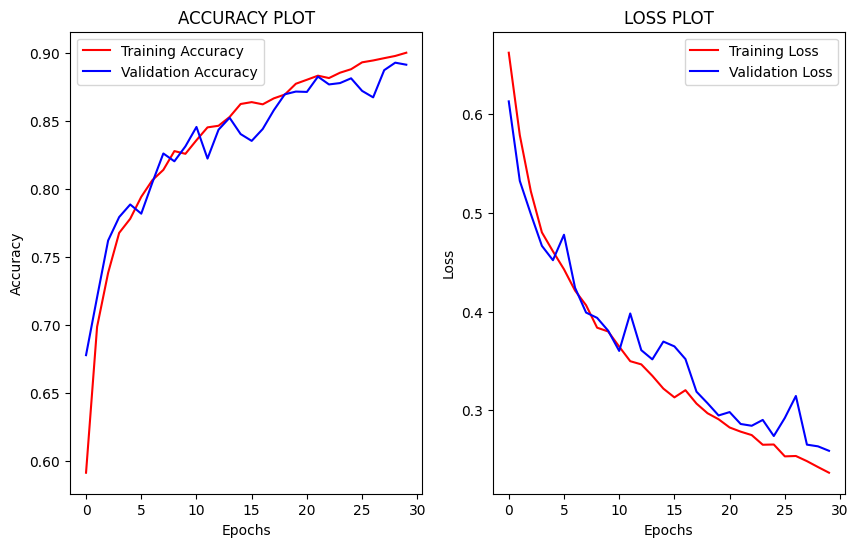

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))


plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Training Accuracy", color="red")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="blue")
plt.title("ACCURACY PLOT")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Training Loss", color="red")
plt.plot(history.history["val_loss"], label="Validation Loss", color="blue")
plt.title("LOSS PLOT")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()



In [14]:
# Predict probabilities
y_pred = model.predict(testdata, steps=testdata.samples // batchsize + 1)

# If you have 2 classes (cat & dog), take the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)


157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step


In [15]:
y_true = testdata.classes   # actual labels from test folder
class_labels = list(testdata.class_indices.keys())  # ['cat', 'dog']
print(y_true)
print(class_labels
     )

[0 0 0 ... 1 1 1]
['cats', 'dogs']


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_true, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:\n", cm)


Test Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

        cats       0.50      1.00      0.67      2500
        dogs       0.00      0.00      0.00      2500

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.33      5000
weighted avg       0.25      0.50      0.33      5000


Confusion Matrix:
 [[2500    0]
 [2500    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


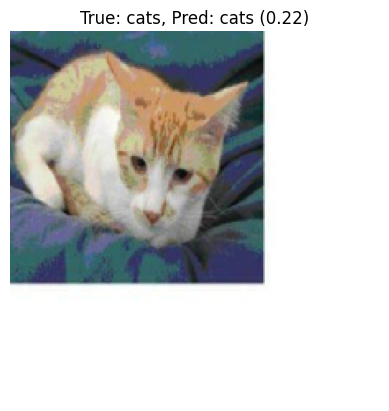

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


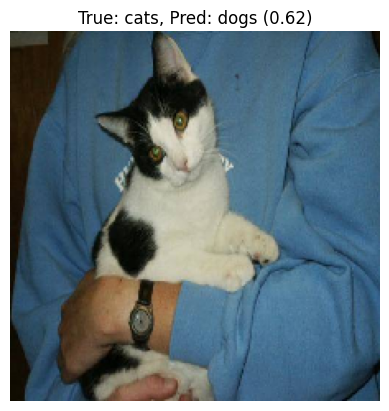

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


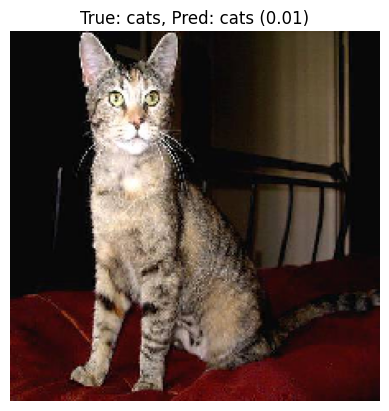

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


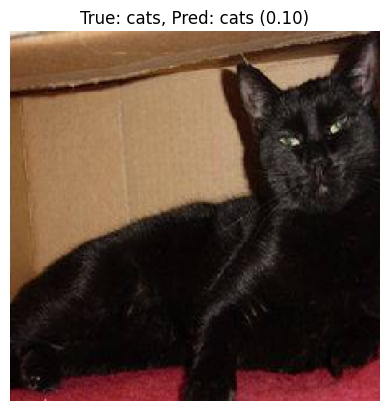

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


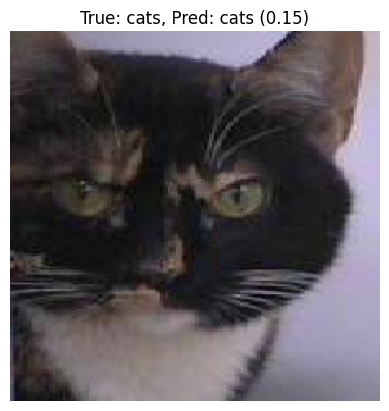

In [17]:

import random

# Your class labels
class_labels = list(testdata.class_indices.keys())  # ['cat', 'dog']

# Get a random batch from test generator
images, labels = next(testdata)

for i in range(5):
    idx = random.randint(0, len(images)-1)
    img = images[idx]
    true_label = class_labels[int(labels[idx])]   # since binary mode
    pred = model.predict(img[np.newaxis, ...])[0][0]
    pred_label = class_labels[int(pred > 0.5)]

    plt.imshow(img)
    plt.title(f"True: {true_label}, Pred: {pred_label} ({pred:.2f})")
    plt.axis("off")
    plt.show()


In [18]:
print(traindata.class_indices)
print(traindata.classes)  # first 20 labels


{'cats': 0, 'dogs': 1}
[0 0 0 ... 1 1 1]


In [19]:
print(testdata.class_indices)


{'cats': 0, 'dogs': 1}
